In [1]:
import pandas as pd

df = pd.read_csv("QueryResults.csv")


In [2]:
df.head()
df.tail()
df.shape
df.columns


Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [3]:
df.columns = ["Date", "Tag", "PostCount"]


In [4]:
df["Date"] = pd.to_datetime(df["Date"])


In [5]:
python_df = df[df["Tag"] == "python"]
python_df.head()


,Date,Tag,PostCount
4,2008-08-01,python,124
19,2008-09-01,python,542
31,2008-10-01,python,510
37,2008-11-01,python,452
56,2008-12-01,python,441


In [6]:
df["Tag"].value_counts()


Tag
c#            145
assembly      144
javascript    144
c             144
python        144
perl          144
c++           144
java          144
delphi        144
ruby          144
php           144
r             142
swift         135
go            129
Name: count, dtype: int64

In [8]:
# Etiketlere Göre Toplam Soru Sayısı
df.groupby("Tag")["PostCount"].sum().sort_values(ascending=False)


Tag
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: PostCount, dtype: int64

In [9]:
df.groupby("Date")["PostCount"].sum()


Date
2008-07-01         3
2008-08-01      1552
2008-09-01      6086
2008-10-01      6611
2008-11-01      5633
               ...  
2020-03-01     95219
2020-04-01    114715
2020-05-01    116224
2020-06-01    105559
2020-07-01    103826
Name: PostCount, Length: 145, dtype: int64

In [11]:
#Etiket & Tarih Pivot Tablosu
pivot_df = df.pivot(index="Date", columns="Tag", values="PostCount")
pivot_df.head()


Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [12]:
pivot_df.fillna(0, inplace=True)


<Axes: xlabel='Date'>

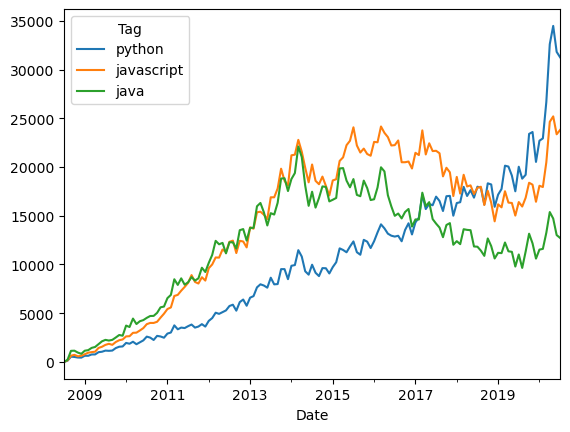

In [14]:
#Diller Arası Karşılaştırma
pivot_df[["python", "javascript", "java"]].plot()
